# Práctica Ipython

## Análisis experimental

### Insertion Sort
Implementación Cormen

In [96]:
def insertionSort(n):
    j=1
    while j<len(n):
        llave=n[j]
        i=j-1
        while i>=0 and n[i]>llave:
            n[i+1]=n[i]
            i=i-1
        n[i+1]=llave
        j=j+1

Inicialización de los arreglos de tamaño 4, 5 y 6.

In [139]:
import time
import itertools
import math

menor=4
mayor=6

arreglos=[]
for i in range(menor,mayor+1):
    lista=list(range(i))
    arreglos.append(lista)

print arreglos

[[0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5]]


Arreglo de tamaño 4.

In [161]:
datos=[]
for arreglo in arreglos:
    tiempos=[]
    permutaciones=list(itertools.permutations(arreglo))
    for i in permutaciones:
        lista=list(i)
        #print lista,
        tInicial=time.clock()
        insertionSort(lista)
        #print lista,
        tFinal=time.clock()
        tTotal=tFinal-tInicial
        #print tTotal
        tiempos.append(tTotal)
    datos.append(tiempos)

mejores=[]
peores=[]
promedios=[]
    
for i in xrange(len(arreglos)):
    print "Arreglo de tamaño:",len(arreglos[i])
    print "Mejor:",datos[i][0]
    mejores.append(datos[i][0])
    print "Peor:",datos[i][len(datos[i])-1]
    peores.append(datos[i][len(datos[i])-1])
    prom=sum(datos[i])/len(datos[i])
    print "Promedio:",prom
    promedios.append(prom)
    #print datos[i][len(datos[i])-1]-datos[i][0]    
    print ""
    

Arreglo de tamaño: 4
Mejor: 8.55272082845e-06
Peor: 4.56145062344e-06
Promedio: 4.39514769823e-06

Arreglo de tamaño: 5
Mejor: 3.99127020501e-06
Peor: 6.84217775415e-06
Promedio: 5.8586133188e-06

Arreglo de tamaño: 6
Mejor: 4.56145062344e-06
Peor: 9.12290124688e-06
Promedio: 6.28862504628e-06



### Interpolación

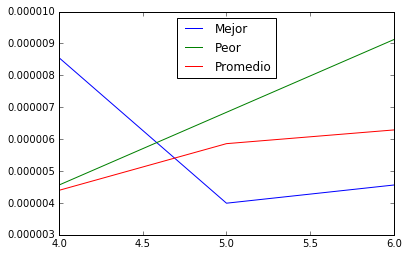

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(menor,mayor,mayor-menor+1,endpoint=True)
x2 = np.linspace(menor,mayor,10,endpoint=True)

f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')


plt.plot(x,mejores,x,peores,x,promedios)
#plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Peor','Promedio'],loc='best')

